In [1]:
#credits to SO https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
# pip install shutup 

import shutup
shutup.please()

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

import networkx as nx
import hypernetx as hnx

plt.rcParams["figure.figsize"] = (6, 4)

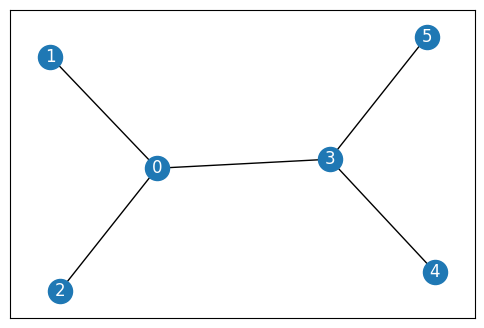

In [3]:
# Undirected Graph
graph = nx.Graph()
nodes = list(range(5))
graph.add_nodes_from(nodes)
edges = [(0,1),(3,4),(3,0),(3,5),(2,0)]
graph.add_edges_from(edges)
nx.draw_networkx(graph, font_color = "white")

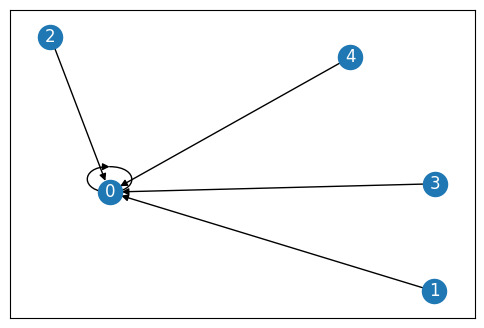

In [4]:
# Directed Graph
digraph = nx.DiGraph()
nodes = list(range(5))
edges = [(0,0),(4,0),(1,0),(3,0),(2,0)]
digraph.add_nodes_from(nodes)
digraph.add_edges_from(edges)
nx.draw_networkx(digraph, font_color = "white")

{0: Text(-2.4459358204377876e-07, 5.744512183241185e-07, '0'),
 1: Text(0.9999990246930782, 0.9999994236465076, '1'),
 2: Text(-0.9999990136607423, 0.999999601538376, '2'),
 3: Text(-0.9999991884711444, -1.0, '3'),
 4: Text(0.9999994220323908, -0.999999599636102, '4')}

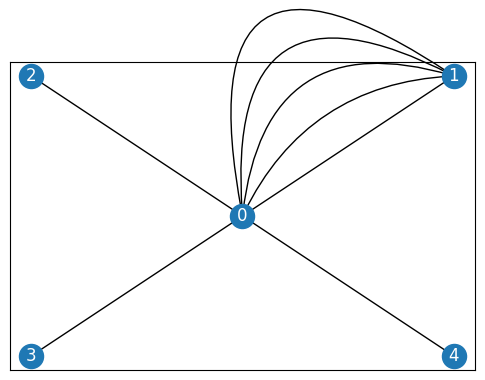

In [5]:
# Multigraph
multigraph = nx.MultiGraph()
nodes = list(range(5))
edges = [(0,0),(4,0),(1,0),(1,0),(1,0),(1,0),(1,0),(3,0),(2,0)]
multigraph.add_nodes_from(nodes)
multigraph.add_edges_from(edges)

pos = nx.kamada_kawai_layout(multigraph)
ax = plt.gca()

for my_edge in multigraph.edges:
    ax.annotate("", xy=pos[my_edge[0]], xycoords='data', xytext=pos[my_edge[1]], textcoords='data', arrowprops=dict(arrowstyle="-", connectionstyle=f"arc3, rad={0.3*my_edge[2]}"),zorder=1)

nx.draw_networkx_nodes(multigraph, pos)
nx.draw_networkx_labels(multigraph, pos, font_color = "w")

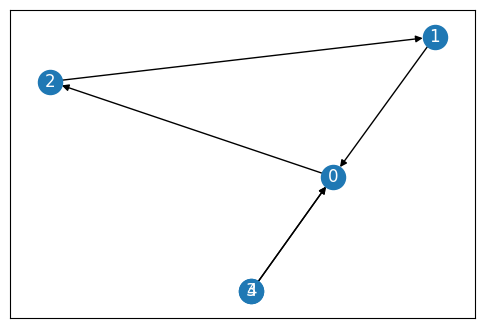

In [8]:
# Acyclic Graph (Tree)
acyclic_graph = nx.DiGraph()
nodes = list(range(5))
edges = [(4,0),(1,0),(3,0),(0,2),(2,1)]
acyclic_graph.add_nodes_from(nodes)
acyclic_graph.add_edges_from(edges)

nx.draw_networkx(acyclic_graph, nx.kamada_kawai_layout(acyclic_graph), with_labels= True, font_color = "white")
plt.show()

In [9]:
nx.is_directed_acyclic_graph(acyclic_graph)

False

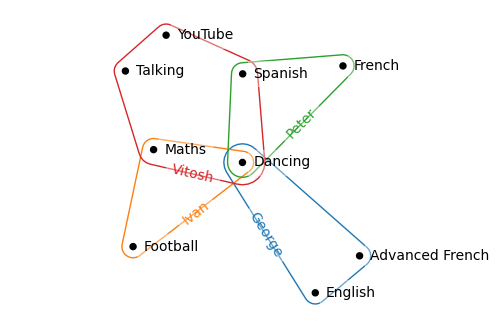

In [10]:
#Hypergraph
data = {
    "Ivan":("Football","Maths","Dancing"),
    "Peter":("French","Spanish","Dancing"),
    "George":("Dancing","English","Advanced French"),
    "Vitosh":("Maths","Dancing","Spanish","Talking", "YouTube"),
}
H = hnx.Hypergraph(data)
hnx.draw(H)

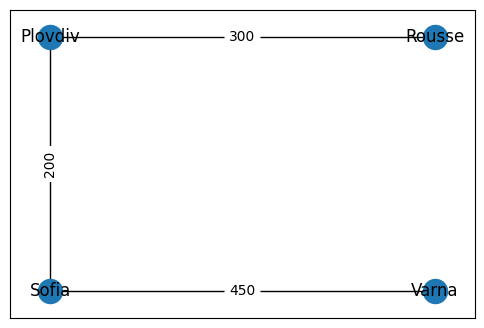

In [11]:
# Weighted Graph 
weighted_graph = nx.Graph()
weighted_graph.add_node("Sofia", pos=(0,0))
weighted_graph.add_node("Plovdiv", pos=(0,2))
weighted_graph.add_node("Varna", pos=(2,0))
weighted_graph.add_node("Rousse", pos=(2,2))

weighted_graph.add_weighted_edges_from([("Sofia", "Plovdiv", 200),
                                       ("Sofia","Varna",450),
                                        ("Plovdiv","Rousse",300)])

pos = nx.get_node_attributes(weighted_graph, 'pos')
nx.draw_networkx(weighted_graph, pos, with_labels=True)
nx.draw_networkx_edge_labels(weighted_graph, pos,edge_labels={(u,v):d['weight'] for u,v,d in weighted_graph.edges(data=True)})
plt.show()

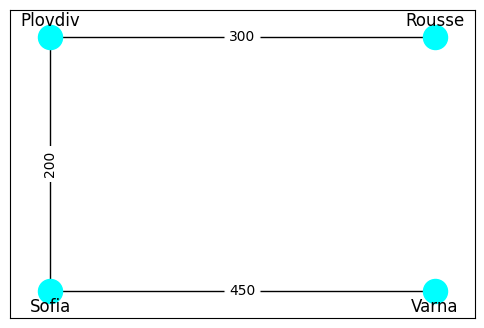

In [12]:
# Weighted Graph - improved with offset

nx.draw_networkx(weighted_graph, pos, with_labels=False, node_color = 'cyan')
labels = {node: node for node in weighted_graph.nodes()}
node_labels = nx.draw_networkx_labels(weighted_graph, pos, labels=labels,font_size = 12)

offset = .12
node_labels["Sofia"].set_position((pos["Sofia"][0], pos["Sofia"][1] - offset))
node_labels["Varna"].set_position((pos["Varna"][0], pos["Varna"][1] - offset))
node_labels["Plovdiv"].set_position((pos["Plovdiv"][0], pos["Plovdiv"][1] + offset))
node_labels["Rousse"].set_position((pos["Rousse"][0], pos["Rousse"][1] + offset))

nx.draw_networkx_edge_labels(weighted_graph, pos,edge_labels={(u,v):d['weight'] for u,v,d in weighted_graph.edges(data=True)})
plt.show()